## 1. Librerías y configuración incial

In [8]:
import pandas as pd             # manipulación de datos
import numpy as np              # manipulación de datos
import matplotlib.pyplot as plt # visualización
import seaborn as sns           # visualización

#!pip install rpy2
from rpy2.robjects.packages import importr
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
%load_ext rpy2.ipython
base = importr('base')

Unable to determine R library path: Command '('C:\\PROGRA~1\\R\\R-41~1.0\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.
C:\Users\karin\ANACON~1\envs\rladies\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [4]:
from pathlib import Path
import os
p = Path(os.getcwd()).parent
path_data = f'{p}/02_slides/data/df_arg_mx.csv'.replace('\\','/')

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(path_data)
df['expo_netas_pos'] = np.where(df['trade_value_usd_exp']-df['trade_value_usd_imp']>0,1,0)
scaler = StandardScaler()
df['expo_scaled'] = scaler.fit_transform(df[['trade_value_usd_exp']])

R[write to console]: `geom_smooth()` using formula 'y ~ x'



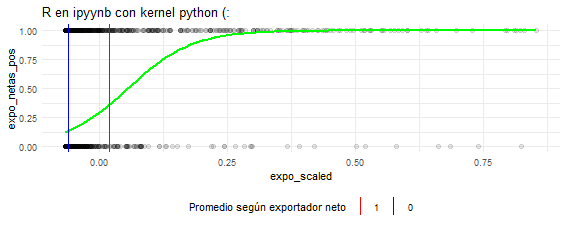

In [88]:
%%R -i df -w 20 -h 8 --units cm
options(scipen=999)
library("tidyverse")

df %>% 
    filter(expo_scaled <= quantile(expo_scaled,0.99)) %>%
    group_by(expo_netas_pos) %>%
    mutate(promedio = mean(expo_scaled)) %>% 
    ungroup() %>%
    ggplot(aes(x=expo_scaled, y=expo_netas_pos)) + 
        geom_point(size=2, color='black', alpha=0.1)+
        geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, color='green') +
        geom_vline(aes(xintercept=promedio, color=factor(expo_netas_pos, levels=c('1','0'))))+
        labs(title="R en ipyynb con kernel python (:", color='Promedio según exportador neto')+
        scale_color_manual(values=c('red','blue'))+
        theme_minimal()+
        theme(legend.position='bottom')


In [ ]:
%%R -i weather -w 15 -h 10 --units cm

informe <- "c:/Users/karin/Documents/Proyectos/rladies_charlas/01_r_python/03_markdown/r_python_parametrizado.Rmd"

rmarkdown::render(
    informe,
    params = list(
        param1 = 'Este es un NUEVO parametro'
    )
)